## Example how to Speed up a calculation by vectorial operations
### Example demonstrates how to calculate a volume of a cylinder for a large list of diameters
### $V = A L = \frac{\pi}{4} D^2 L$
#### where:
#### $V$&nbsp; is the volume of the cylinder
#### $A$&nbsp; is the area of the cross-section (circumference)
#### $D$&nbsp; is the diameter of the cross-section (circumference)
#### $L$&nbsp; is the length of the cylinder

In [1]:
import numpy as np
import datetime as dt

In [2]:
# Used in the first 1st, 2nd and 3rd step:
def volume_of_cylinder(diam: float, length: float) -> float:
    """ Calculate Volume of a Cylinder """
    return diam ** 2 * (np.pi / 4) * length

# Used in last 4th step:
def volume_of_cylinder_np(diameter_np: np.array, length_np: np.array) -> np.array:
    """ Calculate volume of a Cylinder through numpy (more efficient) """
    return diameter_np ** 2 * (np.pi / 4) * length_np

# Define list of values (increasing variable value list)
diameter_list = list(range(1000000))
length_list = list(range(1000000))

# Convert lists to numpy arrays
diameter_array = np.array(diameter_list)
length_array = np.array(length_list)

#### 1st Method - For Loop appending to a list

In [3]:
# Normal For Loop operation (no numpy)
start = dt.datetime.now()

volumes1 = []
for idx, diameter in enumerate(diameter_list):
    volumes1.append(volume_of_cylinder(diameter, length_list[idx]))

end = dt.datetime.now()
delta1 = (end - start).total_seconds()

print(f"Result of index 1000 is {volumes1[1000]:.2f} m3 - Running time was {delta1:.4f} seconds")

Result of index 1000 is 785398163.40 m3 - Running time was 0.6365 seconds


#### 2nd Method - Using list comprehension

In [4]:
# Function operating with lists (list comprehension)
start = dt.datetime.now()

def volume_of_cylinder_list(diam_list: list[float], len_list: list[float]) -> list[float]:
    """ Calculate Volume of a Cylinder """
    return [(rad ** 2 * (np.pi/4) * thick) for rad, thick in zip(diam_list, len_list)]
volumes2 = volume_of_cylinder_list(diam_list=diameter_list, len_list=length_list)

end = dt.datetime.now()
delta2 = (end - start).total_seconds()

print(f"Result of index 1000 is {volumes2[1000]:.2f} m3 - Running time was {delta2:.4f} seconds")

Result of index 1000 is 785398163.40 m3 - Running time was 0.4084 seconds


#### 3rd Method - Using Numpy Vectorize Function

In [5]:
# Using the 'Vectorize' Numpy Function
start = dt.datetime.now()

vector_function = np.vectorize(volume_of_cylinder)
volumes3 = vector_function(diameter_array, length_array)

end = dt.datetime.now()
delta3 = (end - start).total_seconds()

print(f"Result of index 1000 is {volumes3[1000]:.2f} m3 - Running time was {delta3:.4f} seconds")

Result of index 1000 is 785398163.40 m3 - Running time was 0.5023 seconds


#### 4th Method - Pure Numpy calculation

In [6]:
# Fully Numpy Operation
start = dt.datetime.now()

volumes4 = volume_of_cylinder_np(diameter_np=diameter_array, length_np=length_array)
end = dt.datetime.now()

delta4 = (end - start).total_seconds()

print(f"Result of index 1000 is {volumes4[1000]:.2f} m3 - Running time was {delta4:.4f} seconds")

Result of index 1000 is 785398163.40 m3 - Running time was 0.0080 seconds


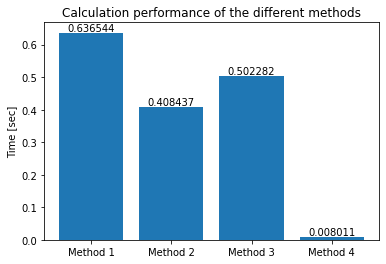

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

time = [delta1, delta2, delta3, delta4]
p1 = ax.bar(np.arange(4), time, label='Method 1')

ax.set_ylabel('Time [sec]')
ax.set_title('Calculation performance of the different methods')
ax.set_xticks(np.arange(4), labels=['Method 1', 'Method 2', 'Method 3', 'Method 4'])
ax.bar_label(p1, label_type='edge')
plt.show()